In [1]:
import os
import numpy as np

In [2]:
data_path = "/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset"
subject_file = "MWEEG_Subject_0.npz"

In [3]:
data = np.load(os.path.join(data_path, subject_file))
data

NpzFile '/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset/MWEEG_Subject_0.npz' with keys: EEG, TriggerValues, SampleTime, TriggerTime

In [4]:
eeg = data["EEG"]              # shape (16, T)
triggervalues = data["TriggerValues"]
sampletimes = data["SampleTime"]
triggertime = data["TriggerTime"]

print("EEG shape:", eeg.shape)
print("Trigger values:", triggervalues.shape)
print("Sample times:", sampletimes.shape)
print("Trigger time:", triggertime.shape)

EEG shape: (16, 1025138)
Trigger values: (13,)
Sample times: (1025138,)
Trigger time: (1025138,)


In [5]:
import mne

sfreq = 1024  # Sampling frequency
ch_names = ["Fpz", "Fp1", "Fp2", "F7", "F8", "F3", "F4", "T7", "T8", "C3", "C4","P7", "P8", "O1", "O2", "Oz"]
ch_types = ["eeg"] * eeg.shape[0]

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(eeg, info)
print(raw)

Creating RawArray with float64 data, n_channels=16, n_times=1025138
    Range : 0 ... 1025137 =      0.000 ...  1001.110 secs
Ready.
<RawArray | 16 x 1025138 (1001.1 s), ~125.2 MiB, data loaded>


Using matplotlib as 2D backend.


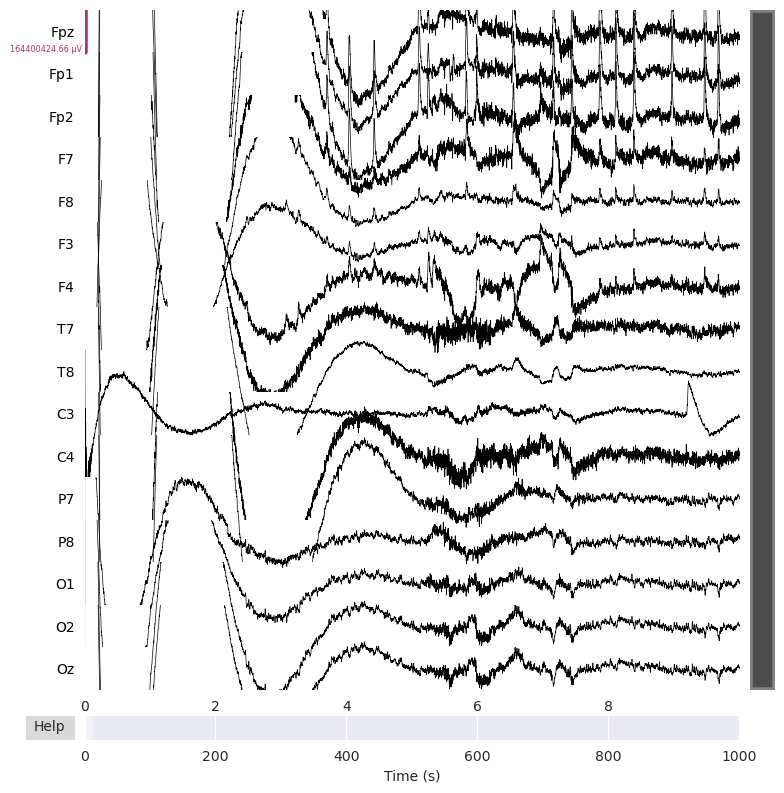

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_191114/649542911.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/home/sparsh/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


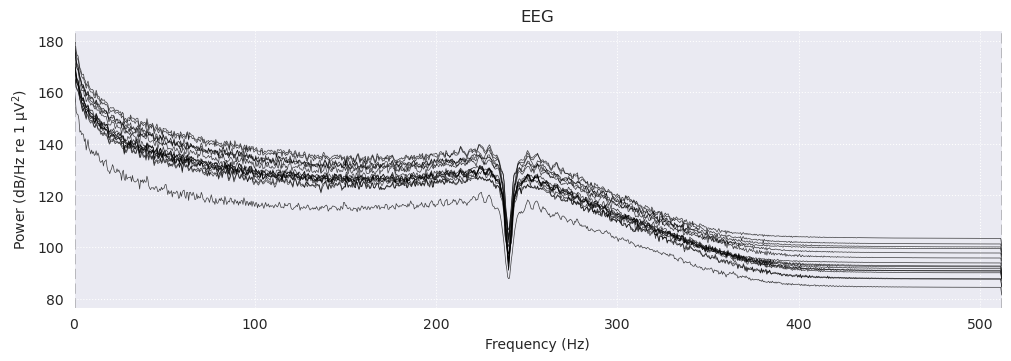

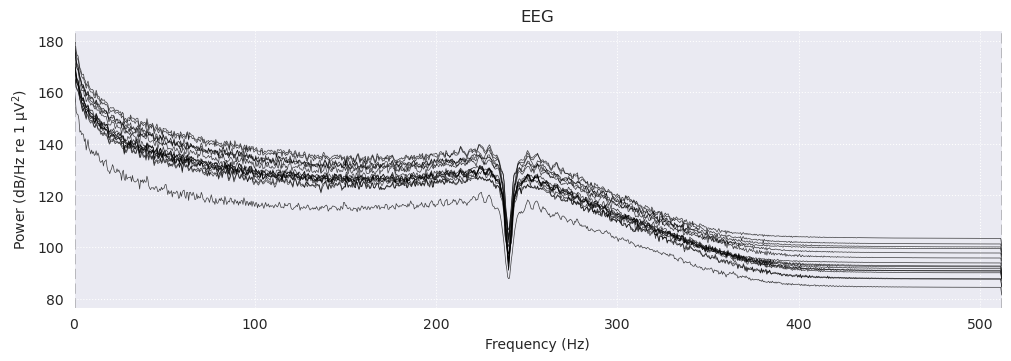

In [6]:
raw.plot(title="Raw EEG Data (Unfiltered)", scalings='auto')
raw.compute_psd().plot()

In [7]:
raw.filter(1., 30., fir_design="firwin")
raw.notch_filter(freqs=60)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (3.302 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge

<RawArray | 16 x 1025138 (1001.1 s), ~125.2 MiB, data loaded>

Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (3.302 s)



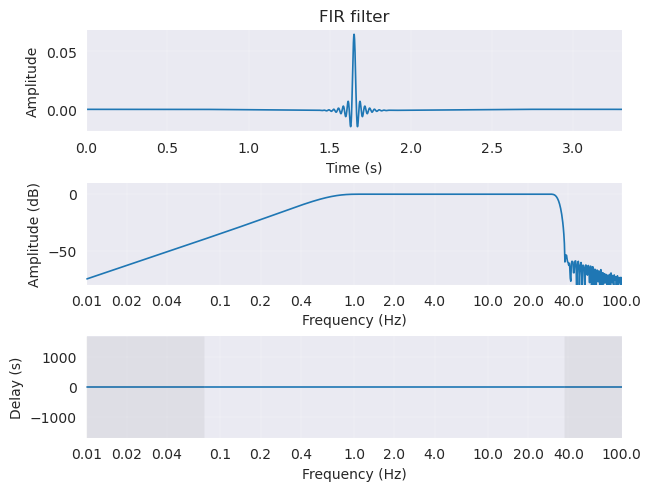

In [8]:
import matplotlib.pyplot as plt

filt = mne.filter.create_filter(raw.get_data(), sfreq=sfreq, l_freq=1.0, h_freq=30.0)
mne.viz.plot_filter(filt, sfreq, flim=(0.01, 100))
plt.show()

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


/home/sparsh/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


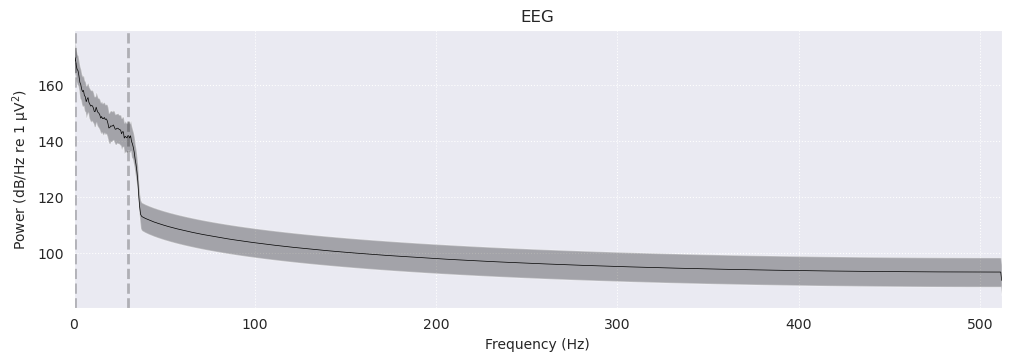

In [9]:
raw.compute_psd().plot(average = True)

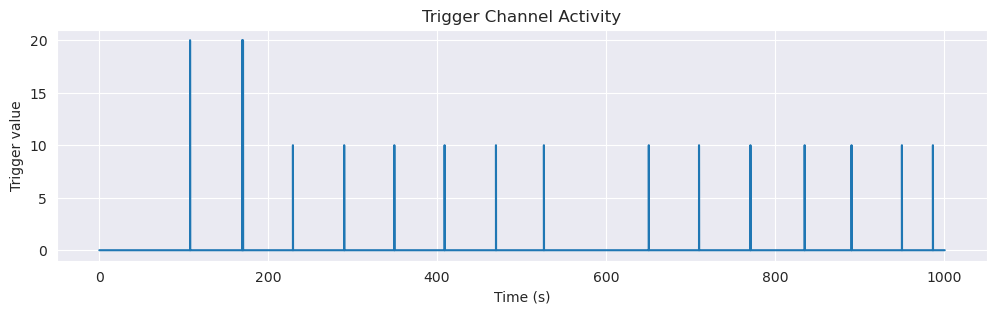

In [17]:
plt.figure(figsize=(12, 3))
time = np.arange(len(triggertime)) / sfreq
plt.plot(time, triggertime)
plt.xlabel("Time (s)")
plt.ylabel("Trigger value")
plt.title("Trigger Channel Activity")
plt.grid(True)
plt.show()

In [21]:
trigger_indices = np.where(triggertime != 0)[0]
print("Detected trigger indices:", trigger_indices.shape)

n = min(len(trigger_indices), len(triggervalues))
trigger_indices = trigger_indices[:n]
triggervalues = triggervalues[:n]

Detected trigger indices: (16,)


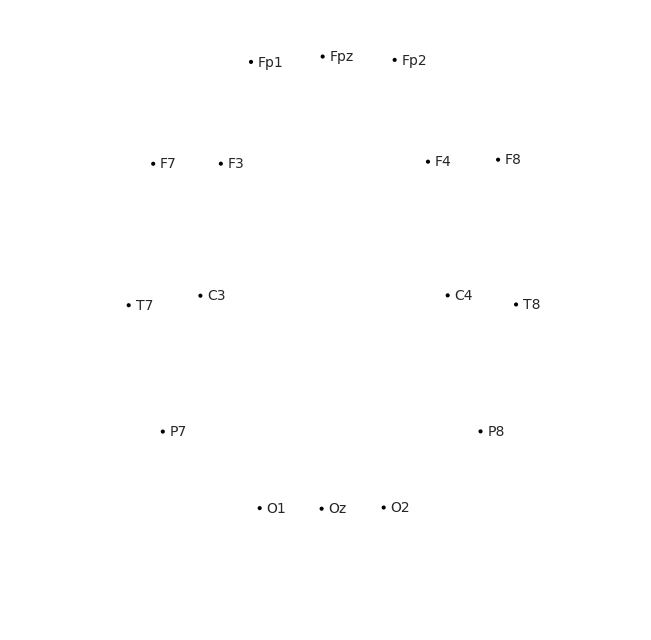

In [23]:
# Set the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

raw.plot_sensors(ch_type='eeg', show_names=True)  # sensor location ko plot karenge
plt.show()